## Task 1

You are provided with a small subset of data on in-store
purchases by a chain of supermarkets. You are required to provide your input.

In [ ]:
pip install pyreadr

In [ ]:
import pyreadr 


In [ ]:
# reading R file 
result = pyreadr.read_r("/content/task1.rds")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to etract Pandas DF
df = result[None]

## Data Cleaning

In [ ]:
df.head()

,d_date_id,d_time_id,d_store_id,d_loyalty_instrument_id,d_item_id,d_global_item_id,d_person_id,d_promotion_id,d_currency_id,d_item_group_id,bon_id,bon_id_int,hascard,hasch,unit_price,quantity,sales_amount,sales_amount_before_discount,vat_amount,discount_amount,items_count,card_items_count,card_quantity,card_sales_amount,card_discount_amount,promotion_items_count,promotion_quantity,promotion_sales_amount,promotion_discount_amount,price_w
0,20140901,15,5,1,1,8320,1,1,3,0,M042014090101000002000088,456567,0,0,0.505051,1.0,0.505051,0.505051,0.083838,0.0,1,0,0.0,0.0,0.0,0,0,0.0,0.0,0.505051
1,20140901,15,9,1,1,1,1,1,3,0,M112014090101000008000109,774482,0,0,1.707071,1.0,1.707071,1.707071,0.284848,0.0,1,0,0.0,0.0,0.0,0,0,0.0,0.0,1.707071
2,20140901,15,9,1,1,1113,1,1,3,0,M112014090101000005000109,769791,0,0,0.454545,6.0,2.727273,2.727273,0.454545,0.0,1,0,0.0,0.0,0.0,0,0,0.0,0.0,2.727270
3,20140901,15,9,1,1,3336,1,1,3,0,M112014090101000008000109,774482,0,0,3.535354,1.0,3.535354,3.535354,0.588889,0.0,1,0,0.0,0.0,0.0,0,0,0.0,0.0,3.535354
4,20140901,15,9,1,1,11707,1,1,3,0,M112014090101000002000109,774481,0,0,0.959596,1.0,0.959596,0.959596,0.159596,0.0,1,0,0.0,0.0,0.0,0,0,0.0,0.0,0.959596


In [ ]:
df.isnull().sum()

d_date_id                       0
d_time_id                       0
d_store_id                      0
d_loyalty_instrument_id         0
d_item_id                       0
d_global_item_id                0
d_person_id                     0
d_promotion_id                  0
d_currency_id                   0
d_item_group_id                 0
bon_id                          0
bon_id_int                      0
hascard                         0
hasch                           0
unit_price                      0
quantity                        0
sales_amount                    0
sales_amount_before_discount    0
vat_amount                      0
discount_amount                 0
items_count                     0
card_items_count                0
card_quantity                   0
card_sales_amount               0
card_discount_amount            0
promotion_items_count           0
promotion_quantity              0
promotion_sales_amount          0
promotion_discount_amount       0
price_w       

## Data Preprocessing

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(100000, 30)

In [ ]:
df.columns

Index(['d_date_id', 'd_time_id', 'd_store_id', 'd_loyalty_instrument_id',
       'd_item_id', 'd_global_item_id', 'd_person_id', 'd_promotion_id',
       'd_currency_id', 'd_item_group_id', 'bon_id', 'bon_id_int', 'hascard',
       'hasch', 'unit_price', 'quantity', 'sales_amount',
       'sales_amount_before_discount', 'vat_amount', 'discount_amount',
       'items_count', 'card_items_count', 'card_quantity', 'card_sales_amount',
       'card_discount_amount', 'promotion_items_count', 'promotion_quantity',
       'promotion_sales_amount', 'promotion_discount_amount', 'price_w'],
      dtype='object')

In [ ]:
df.describe()

,d_date_id,d_time_id,d_store_id,d_loyalty_instrument_id,d_item_id,d_global_item_id,d_person_id,d_promotion_id,d_currency_id,d_item_group_id,bon_id_int,hascard,hasch,unit_price,quantity,sales_amount,sales_amount_before_discount,vat_amount,discount_amount,items_count,card_items_count,card_quantity,card_sales_amount,card_discount_amount,promotion_items_count,promotion_quantity,promotion_sales_amount,promotion_discount_amount,price_w
count,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.000000,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,2.014090e+07,33.069120,4.395450,1.08819,1.0,51371.395310,27.993150,1.0,3.0,0.0,621617.840530,0.00207,0.00207,2.174284,1.528974,2.263274,2.263378,0.372167,0.000104,1.304570,0.004180,0.000633,0.001108,0.000035,0.0,0.0,0.0,0.0,2.263103
std,2.022593e+00,7.290115,5.022286,2.08840,0.0,51784.664582,682.441463,0.0,0.0,0.0,104743.459331,0.04545,0.04545,4.276622,2.940146,4.246944,4.247068,0.706008,0.006869,0.999668,0.109557,0.045718,0.060190,0.003491,0.0,0.0,0.0,0.0,4.246847
min,2.014090e+07,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.0,3.0,0.0,417974.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,-0.001010,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,2.014090e+07,27.000000,1.000000,1.00000,1.0,6997.000000,1.000000,1.0,3.0,0.0,544959.000000,0.00000,0.00000,0.757576,1.000000,0.858586,0.858586,0.134343,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.858586
50%,2.014090e+07,34.000000,2.000000,1.00000,1.0,15073.000000,1.000000,1.0,3.0,0.0,613816.500000,0.00000,0.00000,1.262626,1.000000,1.505051,1.505051,0.244444,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.505051
75%,2.014091e+07,40.000000,7.000000,1.00000,1.0,125435.000000,1.000000,1.0,3.0,0.0,710490.250000,0.00000,0.00000,2.373737,1.100000,2.616162,2.616162,0.434344,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.616162
max,2.014091e+07,48.000000,19.000000,66.00000,1.0,132749.000000,20523.000000,1.0,3.0,0.0,835447.000000,1.00000,1.00000,605.050505,168.000000,605.050505,605.050505,100.841414,0.934343,60.000000,10.000000,12.000000,6.079798,0.590909,0.0,0.0,0.0,0.0,605.050505


In [ ]:
df['bon_id'].unique()

array(['M042014090101000002000088', 'M112014090101000008000109',
       'M112014090101000005000109', ..., 'QTU2014090715000071000149',
       'QTU2014090704000258000125', 'QTU2014090714000800000125'],
      dtype=object)

In [ ]:
df['bon_id_int'].value_counts()

511660    93
638753    83
638158    79
637588    77
511121    76
          ..
496024     1
818124     1
638793     1
678108     1
681058     1
Name: bon_id_int, Length: 24426, dtype: int64

In [ ]:
df['d_store_id'].unique()

array([ 5,  9, 11, 12, 19,  3,  7, 10, 13, 14, 15, 16, 17,  4,  8, 18,  2,
        1], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# Question 1

Identify and visualize which store has the
highest turnover within the available time.


In [ ]:
store_sales = df.groupby('d_store_id')['sales_amount'].mean()
store_sales

d_store_id
1     2.431605
2     2.455942
3     1.984483
4     2.066048
5     1.880646
7     1.979616
8     2.033179
9     1.886854
10    1.897459
11    1.554724
12    1.897631
13    2.155454
14    1.673155
15    2.024906
16    1.722042
17    1.841603
18    2.149530
19    1.712356
Name: sales_amount, dtype: float64

In [ ]:
store_sales = df.groupby('d_store_id')['sales_amount'].mean()

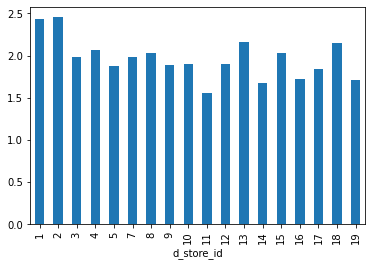

In [ ]:
store_sales.plot(kind='bar')
plt.show()

Store 2 has the highest number of sales

## Question 2 and 3

In [ ]:
# selecting two informative variables as per my analysis
df2 =df[['bon_id','bon_id_int']]

In [ ]:
import pandas as pd


In [ ]:
#selecting a sample of the dataset
df7 = df2.iloc[0:100:,0:100]

In [ ]:
df3 = pd.get_dummies(df7,'bon_id')

In [ ]:
df3.shape

(100, 55)

In [ ]:
df3.head()

,bon_id_int,bon_id_M012014090101000001000150,bon_id_M012014090101000005000150,bon_id_M012014090101000007000150,bon_id_M012014090101000010000150,bon_id_M012014090101000016000150,bon_id_M022014090104000006000014,bon_id_M022014090104000012000014,bon_id_M042014090101000002000088,bon_id_M042014090101000003000088,bon_id_M042014090101000007000088,bon_id_M072014090101000001000156,bon_id_M072014090101000002000156,bon_id_M112014090101000002000109,bon_id_M112014090101000005000109,bon_id_M112014090101000008000109,bon_id_M112014090101000015000109,bon_id_M112014090101000016000109,bon_id_M112014090101000018000109,bon_id_M112014090101000023000109,bon_id_M112014090101000024000109,bon_id_M112014090101000025000109,bon_id_M112014090101000027000109,bon_id_M122014090101000001000092,bon_id_M122014090101000002000092,bon_id_M142014090101000002000030,bon_id_M142014090101000003000030,bon_id_M142014090101000004000030,bon_id_M142014090101000005000030,bon_id_M142014090101000012000030,bon_id_M142014090101000013000030,bon_id_M142014090101000014000030,bon_id_M142014090101000019000030,bon_id_M142014090101000020000030,bon_id_M152014090101000003000163,bon_id_M152014090101000004000163,bon_id_M152014090101000005000163,bon_id_M152014090101000006000163,bon_id_M152014090101000007000163,bon_id_M152014090101000008000163,bon_id_M152014090101000010000163,bon_id_M152014090101000011000163,bon_id_M162014090102000002000166,bon_id_M182014090101000004000156,bon_id_M182014090101000005000156,bon_id_M212014090102000003000114,bon_id_M212014090102000004000114,bon_id_M222014090102000001000036,bon_id_M242014090102000003000153,bon_id_M242014090102000004000153,bon_id_M242014090102000005000153,bon_id_M242014090102000008000153,bon_id_M242014090102000010000153,bon_id_M352014090101000001000128,bon_id_M352014090101000005000128
0,456567,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,774482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,769791,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,774482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,774481,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The next step is to apply the Apriori algorithm on the dataset.The Apriori algorithm will help to extract rules for each possible combination of items, in this case a minimum of three tranactions.

In [ ]:
 pip install apyori

In [ ]:
from apyori import apriori

In [ ]:
association_rules = apriori(df3, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [ ]:
print(association_results[0])

RelationRecord(items=frozenset({'7', '3', '6'}), support=0.01818181818181818, ordered_statistics=[OrderedStatistic(items_base=frozenset({'7', '3'}), items_add=frozenset({'6'}), confidence=1.0, lift=3.235294117647059)])


In [ ]:
transaction_7 = df3['bon_id_int'].values[7]
transaction_3 = df3['bon_id_int'].values[3]
transaction_6 = df3['bon_id_int'].values[6]

In [ ]:
print(transaction_7)
print(transaction_6)
print(transaction_3)

811788
818039
774482


The first item in the list is a list itself containing three items. The first item of the list shows the transactions in the rule.

For instance from the first item, we can see that 7,3 and 6 are commonly done together. 

The support value for the first rule is 0.0182. This number is calculated by dividing the number of transactions containing transaction 7 and 3 divided by total number of transactions. The confidence level for the rule is 1.00 which shows that out of all the transactions that contain transaction 7 and 3, 100% of the transactions also contain transaction 6 . Finally, the lift of 3.24 tells us that transaction 7 and 3 is 3.24 times more likely to be bought by the customers who have transaction 6 as compared to the default likelihood of the sale of transaction 7 and 3



I could not obtain transaction d_global_item_id = 115677 as requested in question 3 due to memory space that had me opt for a limited sample selection. 